## Content

- Motivation for High dim viz

- PCA Introduction/ Intuition

- Applying PCA

- Geometrical Objective

- Mathematical Proof

- Eigen values and vectors



## **Local Outlier Factor (LOF)**

On a higher level, LOF is based on two ideas: **KNN** and **density**

The core idea behind LOF is to compare the density of a point with its neighbors' density

If the density of a point is less than the density of its $k$ neighbors, we flag that point as an outlier

Lets understand it more intuitively.

<img src='https://drive.google.com/uc?id=1nitxn2cZI0S0-WkgFtIPGUJ4oYyldJx_'>

#### **Intuition**

Imagine a bunch of datapoints as shown below

<img src='https://drive.google.com/uc?id=1PP4gMxs0e4SV3mYad9m6FZjZMDka5paA'>

We compute the density of a point based on average distance.
  - if average distane between a point and its $k$ nearest neighbors is large, it is more likely that the point will be an outlier
  - also, larger the value of $k$, more confident are the results

Moving forward, lets get familiar with some concepts to understand the working of LOFs

##### 1(a) **K-distance**

- We define K-distance of a point $A$ as the distance of point $A$ to its **$k^{th}$ nearest neighbor**

- In general, larger the value of k-distance is, farther away the points is from other datapoints

##### 1(b) **Set: $N_{k}(A)$**

- It is a set of k-nearest neighbors of point $A$

##### **2. Reachability distance**

- From point $A$ to point $B$, we define reachability distance as **maximum** of the  distance from point $A$ to point $B$ and the maximum k-distance of point $B$

- Consider point $B$ with some $k$ nearest neighbors shown in the diagram below.

<img src='https://drive.google.com/uc?id=16r3OGoSZWYAcC9sDkiadDt311feWt7Rp'>

- There is a possibilty that some neighbors might be close(condition 1) and some neighbors might be very far away(condition 2)

- In this case, there is a neighbor of point $B$ whose k-distance $>$ the distance between point $A$ and $B$, and hence, it is considered as its reachability distance

- In this case, point $A$ may or may not be a k-nearest neighbor of point $B$

##### **3. Local Reachability Density**

It is often represented as $lrd_{k}(A)$, which tells local reachability density of a point $A$

It is defined as the average reachability distance between point $A$ and $k$ neighbors

So, $lrd_{k}(A) = \LARGE\frac{\sum_{B \in N_{k}(A)} rd_{k}(A,B)}{N_{k}(A)}$

  - The summation in above equation represents the sum of reachability distances from a point $A$ and set of neighbors $B$ as $B \in N_{k}(A)$

<img src='https://drive.google.com/uc?id=1czSWF_VCieZrygElO5LPRCm8eEnmYIv1'>

Let us now use these 3 concepts to define LOF

#### **Putting all together**

We define Local Outlier Factore of point $A$ as follows:
  - $LOF_{k}(A)  = \LARGE\frac {\sum_{B \in N_{k}(A)} lrd_{k} (B) }  {|N_{k}(A)| . ldr_{k}(A)}$

$$$$

Whoa!!! This looks scary. What does it mean? Lets see.

$$$$

- $ldr_{k}(A)$ is nothing but the density of point $A$

$$$$

- The expression $\LARGE\frac {\sum_{B \in N_{k}(A)} lrd_{k} (B) }  {|N_{k}(A)|}$ is the average neighborhood density

- So, LOF of point $A$ is nothing but the average neighborhood density(lrd) of point $A$ divided by the density of $A$

<img src='https://drive.google.com/uc?id=1Srtxq_4Sn5KVSOKWIxeJwCRIKEz3ozZH'>

#### **Interpretation of LOF**

Now that we know how to compute LOF for a given point, questions is how to interpret it? Let's see.

- If $LOF(A) = 1$, then we can say that the point $A$ has same density(lrd) as its $k$ nearest neighbors

- If $LOF(A) > 1$, then the $k$ neighbors of point $A$ have higher denstiy than point $A$.
  - That does not mean point $A$ is an outlier. It may or may not be.
  - But if $LOF(A) >> 1$, then point $A$ is definitely an outlier.

- If $LOF(A) < 1$, then point $A$ has more denstiy than its $k$ nearest neighbors.

We compute the LOF for each point, and based on that extract the outliers

<img src='https://drive.google.com/uc?id=1lcT42E2qfJrXRdtVI7k_AhkEVGg5mM3I'>

Let's now see how the results look like:

<img src='https://drive.google.com/uc?id=1-Z2H7fBT6mFCeZhDk213qkA3L_nxjec_'>

You can see that extreme outliers have very high LOF values, while the border points of a dense region has slightly higher values than 1

We dont mark these border points as outliers.

There is a point with LOF value = 2.7383. We mark it as an outlier because it is certainly a lot higher 1.

These is one limitation of LOFs. We don't know what threshold to use and it often depends on the use case and is decided by the domain expert

#### **Quiz-5**
```
If LOF of two points P1 and P2 are 1.045 and 3.356, then in average which point will be marked as an outlier?

a. P1
b. P2
c. Both of them
d. Neither of them
```
**Answer:**

b. P2

In [ ]:
from sklearn.neighbors import LocalOutlierFactor
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.065).fit_predict(df.iloc[:, :2])
df['is_outlier_lof'] = clf

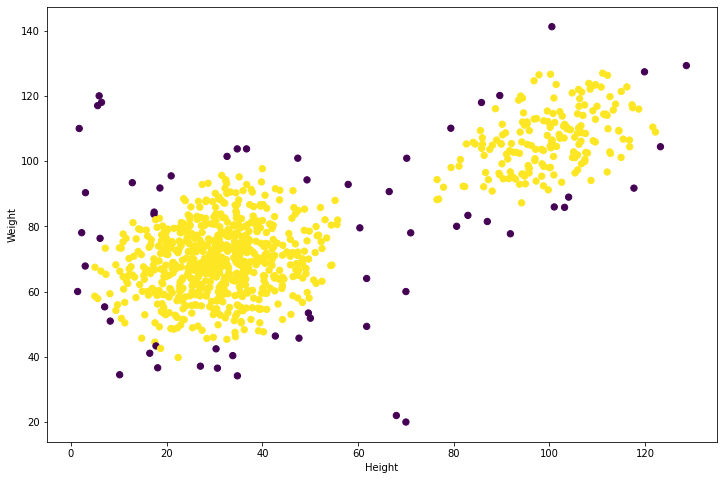

In [ ]:
plt.scatter(df.Mileage, df.Price, s=40, c=df['is_outlier_lof'])
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

#### **Disadvantages of LOF**

1. Finding optimal K
2. Finding threshold.
  - If LOF(A) >> 1, what is the threshold??
3. Cannot handle high dimensional data efficiently
4. High Time Complexity



**Assessments Covered:**
- https://www.scaler.com/hire/test/problem/18439/
- https://www.scaler.com/hire/test/problem/24312/
- https://www.scaler.com/hire/test/problem/24307/
***

## Comparision of Methods

We'll now see a brief comparision of all these methods.

https://scikit-learn.org/stable/auto_examples/miscellaneous/plot_anomaly_comparison.html#sphx-glr-auto-examples-miscellaneous-plot-anomaly-comparison-py

The below given results were obtained from a toy dataset. Let's try to see where each methods performs well and where they might fail

<img src='https://drive.google.com/uc?id=185NwpgsYf0E4VkM9l_RQtjiL27uc97Co'>

**Case 1:** When data is dense at a certain region and sparse around it

- From row 1, We can see that all the methods that we studied performs relatively well when the data is dense at certain region and sparse around it

- You can observe that decsion boundary of One-class SVMs are a little bit broader than the cluster region which might include some outliers if present in that region


**Case 2:** When there are multiple dense regions in the data

- Here also, we can see that each methods performs relatively good.

- In elliptical enevlope(robust covariance) method, you can see the elliptical shapes being formed as a decision boundary. This can include some noise points if present inside the ellipse

**Case 3:** When one cluster is highly dense and other cluster is a little spread out

- Same problem arises with the elliptical envelope method as we saw in the previous case

- Other methods perform quite well and similar.

**Case 4:** When data has two archs

- In this case, you can see that the points in the outer parts of the archs are marked as outliers by all the methods, although they are a part of the archs

**Case 5:** When data is randomly spread

- All the algorithms marks the extreme points at all the four vertices as an outliers

Isolation Forests and LOF, both worked relatively well compared to other methods for all the cases, which explains why they are used oftenly in the industry

***
***

## What we have learnt so far? Motivation for High dim viz

We started off with clustering followed by anomaly detection

In clustering,
- the main question was **number of clusters**

where as in anomaly detection
- the question was how many outlier do we feel there should be
- and we handled this using **contamination** parameter.

#### How did we tackle these questions ?

In order to answer the question of **number of clusters**
- there were technique which such as
    - **elbow method** in Kmeans
    - **Dendrogram** in Hierarichal etc


But these were just the guidelines.



#### Are these guidelines enough to make the decision ?

The **primary way** we decide/ come to the conclusion
- is by **validating it with the business**


For example: Recall the Kmeans cluster of discount shoppers, new user etc.

We made sure the clusters we arrived at, were **making business sense**.

We need some help from the visualization in order to make those decision i.e.
- as elbow method alone is not suffice

So, there is a need for visualizing the data.

#### What data did we work on so far ?

So far, we have only worked with simple data

Recall
- We took 2D data for anomaly detection (Cars 24)
- and 5D data for clustering and visualized it in 3D
    - or we made a polar chart to help us

But the real world data
- can have 20 dimension or more.

**How do we visualize this high dim data?**

For this, we'll be studying high dim viz techniques
- which will help us in visualizing high dim data as a shadow in small dim space.
- and make a more informed guess

Let's into it

## Principal Component Analysis

### Introduction

Say, we are given data of patient's weight and age
- and we want to predict whether person is diabetic or not


Say, the scatter plot of the data is as follows:

<center><img src="https://drive.google.com/uc?export=view&id=1BNTFYHMtyDRsag1N9x7TQFLHbvEQXPI8" width=800></center>

#### **Which feature has more information ? Age or weight?**



> Note: Here, by information, we mean w.r.t solving the classification problem

Here, weight carries more information
- as most of the people have roughly the same age.




So, if we imagine this as a classifcation problem
- there's a chance that people with higher weight belongs to diabetes class
- while ones with lower weight belong to non diabetic class

<center><img src="https://drive.google.com/uc?export=view&id=19TLkPz7x6qKkRfg4gBRZ3GJI14lSd2U2" width=600></center>



To conclude:
- weight is the feature which is helping us distinguish the classes.

That means, for this dataset
- Although we have two features,
    - maybe one of them is important (weight) while the other (age) is not that important.

**But why weight feature ?**
- as age is more or less constant
- and most of the variance lies along the weight

#### Say, we change the features now

- and bring in weight and height.

<center><img src="https://drive.google.com/uc?export=view&id=1T8qOis-oVmvqh-ICiq9q2hNUuJ14d1sF" width=800></center>



**Which feature will be more important now ?**

a. Weight

b. Height

c. New feature vector along Weight + Height

Most of the information will lie along the vector made with combination of height and weight.

The direction of the vector will be:


<center><img src="https://drive.google.com/uc?export=view&id=11iKGHiUjgN7IVhbXEyl0JCcBlOFqC8YF" width=800></center>



For a clear picture, let's do a axis transformation along the new vector


<center><img src="https://drive.google.com/uc?export=view&id=1TQGBFY_42S_1HzEVySB76aCkv-kxAeQ3" width=800></center>





Notice that,
- maximum variance of data lies along the vector w+h

#### Observation

- Not every feature contains equal info.
    - it may not help in solving the task at hand
    - i.e feature may carry noise/ diluted information.

- a combination of new feature may have dense information
    - i.e. it is rich in info compared to original feature



Based on observation,
- we can take the original feature space and
- **transform** it into new smaller feature space i.e. **less number of features**

such that
- each of these new features contain information more densely





<center><img src="https://drive.google.com/uc?export=view&id=1KwXjq44SmIqpRf1vg_xfPX15f5sy7kkd" width=800></center>




If the original feature space had 100% of info/variance

- and new transformed feature space are very less in number compared to original one
- but retain 90% of variance/ information.


#### Conclusion:


Against a small trade off of information loss,
- we are able to reduce the number of features.

- These new features are called **principal components**


So, in our previous example, the principal components will be:


<center><img src="https://drive.google.com/uc?export=view&id=1GmpGoNrVv3KMEtcupERNlt3vqGcoZ3N_" width=800></center>





Interesting properties of these new transformed features/ principal components is:

- they are perpendicular/ orthogonal to each other

- The number of PC will be equal to the number of features present
    - i.e. if we had 20 features, there will be 20 new transformed features/ PC.





Out of these 20 PC, it is possible that
- 10 features are able to explain 90% of variance/ info
- while rest of the 10 features explain 10% of variance info collectively

So, we can decide to keep 10 features
- and hence reducing the features needed.


<center><img src="https://drive.google.com/uc?export=view&id=15Hj38Z0xp-GGOlMUZYlPEL1CbIr-32gT" width=800></center>



#### But, why are we reducing number of features ?

##### Visualization

- In order to visualize the data,
    - we need to bring down the dim to 2 or 3.

So that
- we can make business decision based on the visualized data.

Another need to for visualization is during the process of EDA


#####  Compression



Imagine you are training a DT with 100 features.
- After applying PCA,
    - you were able to compress feature space to 25 features.

Now, using these new 25 features,
- we can train our DT model

This ultimately leads to **faster model training**.

### Applying PCA


#### Case 1:

Say, we have the following data in 3 dimensions

where the plane represents the decision boundary.


<center><img src="https://drive.google.com/uc?export=view&id=1WJCDchbbXQHWToWH6Qk-N_Ehi06RdknI" width=500></center>




When we apply PCA on these given features (x, y, z),
- we'll get 3 Principal Components (PC)

These PCs will be:


<center><img src="https://drive.google.com/uc?export=view&id=1WXvR_jz_55GzQ1ZN2UGRdgUVLZ3BbIZ7" width=500></center>





Out of these 3 PC,
- PC1 is able to capture most of the variance
- while rest of the two don't preserve much of info.

So, we can discard PC2 and PC3

Using this PC1,
- we'll convert given 3 D data into 1D

#### How will we do so?

In order to do so,
- we need to find the coordinates of points on the PC1.

#### Which of the following is the correct way to get the coordinates ?


<center><img src="https://drive.google.com/uc?export=view&id=12yush9rYpyaKq4DlqBqwsR7qHq7Gz8la" width=800></center>




In order to get the coordinates of a point along a line/plane,
- we take the projection of point on the line/plane.

Projection is taken perpendicular to plane/line

So, option 2 is correct.

Once we take take the projection of points on a line,

we'll get something like this:


<center><img src="https://drive.google.com/uc?export=view&id=1BdTdMp3pjmELrq3W0qQaHJit7nFipPsM" width=800></center>




By taking the projection of points on the Principal axis,
- we have converted our 3D data to 1D data

Before applying PCA,
- we had 100% accuracy in classifying <font color="red">red points</font> from <font color="green">green points</font>


After converting the data to 1D,
- are still able to classify both the classes easily.


So, the idea is
- we don't need 3 features
- instead of 3, we can create a new feature which is more efficicent
- and we can use that new feature instead of 3.

Here, in new feature space,

- the decision boundary will be a point



<center><img src="https://drive.google.com/uc?export=view&id=1FRNSJNLVkvL4G8JO9ifLXwqkL_3AXcal" width=800></center>




The **aim of PCA** is
- to preserve as much information as we can in less number of features.

#### Case 2

Say, we have the following data:


<center><img src="https://drive.google.com/uc?export=view&id=102mM8flwjZxjGII_9cYoBCTWR8OetQiw" width=600></center>



We need to find the Principal component
- which will preseve maximum variance of data

The variance can be preseved by only two of the PCs as follows:


<center><img src="https://drive.google.com/uc?export=view&id=1HS9dzqCJOlzaAkPRu_m34p0C_gZCnqz-" width=800></center>



When we project the data onto this plane,

the data will look something like this:


<center><img src="https://drive.google.com/uc?export=view&id=1NV-CuxarujjgSVHYzEXXVFiIaA5vE9b-" width=800></center>






#### Conclusion:

PCA can be referred as :
- act of finding new axis to represent the data such that
    - most of the information can be preseved by less number of principal components

However, this may lead to some loss in information.

Let's see how this loss of info happens

#### Case 3:

#### Which of the following is better pick for first principal component?


<center><img src="https://drive.google.com/uc?export=view&id=1VLarD8OOdyldc9y6GKgycuSOT751rQ0O" width=800></center>




Clearly, option 2 is better option as
- it is in the direction of the data
- and preserves more variance.

The 2nd PC will lie perpendicular to first one.
- However, we are not interested in it.



#### What will data look like after projection ?


Once, we project the data on to PC1.

The data will look like:


<center><img src="https://drive.google.com/uc?export=view&id=1UDYx_dc4olKWLGKpJPhuiXovqndKipWi" width=800></center>




Notice that
- how there is a loss in information
- which eventually causes drop in accuracy.

### Geometrical objective

We saw geometrically
- which Principal component will be preseve max variance.

#### But, how do we find it mathematically?

Given the following PCs, how do we say mathematically, which one is preserving max information ?


<center><img src="https://drive.google.com/uc?export=view&id=1SUGVrK57GJL1OTCpqzGVV0-9OsnOTdPN" width=800></center>



We need to come up with a loss/ cost function
- which helps in finding the best PC.

Any ideas ?

#### First idea

**The perpendicular distance of points from the best PC will be minimum.**

Let's check it out visually.


<center><img src="https://drive.google.com/uc?export=view&id=1CFnv-9p6fqgYZpRVm1EoURvfRtAky6Oa" width=800></center>





Notice that
- distances of point from w2 are large compared to that of w1.


This shows that the best PC will have minimal distances from datapoints.


There's another idea for finding best PC

#### Second idea

Recall that,
- each datapoint is a vector and it is represented as :


<center><img src="https://drive.google.com/uc?export=view&id=19BLvW8WQYALoQcatqO7n5PxCwOStLCdl" width=800></center>




Also, recall calulating the projection of a vector

Suppose, we are given a vector $x_1$ and we want to find its projection length on vector $f_1$, it'll be as follows:


<center><img src="https://drive.google.com/uc?export=view&id=1Ois0rIzTWl3MHJfYcadC5kGa3Effdrpk" width=800></center>



Now,

the first idea was to
- find the vector which minimizes the $\perp$ distance

We can say that,
- Minimizing perpendicular distance is same as maximizing projection length of datapoints on the PC.



#### But, why minimizing perpendicular distance is same as maximizing projection length ?

Say, we have a datapoint and two PC: a and b.

datapoint is closer to vector a
- so it'll have smaller perpendicular distance

while vector b is farther from it
- perpendicular distance from datapoint to vector will be large.

If we were to follow basic principle of right angle triangle,
- as the hypotenuse is fixed
    - if height becomes large, then
    - base of the triangle will become small in order to keep hypotenuse length fixed.

Hence, smaller the perpendicular length,
- larger the projection length.


<center><img src="https://drive.google.com/uc?export=view&id=14IhTzYJjpqzjifZmpv7y1sdM-JU0TXvR" width=800></center>



#### Maximizing projection is same as maximizing variance

Also, note that:
- having maximum projection length is similar to having feature with maximum variance.


If the new feature is in the direction of data,
- it'll have max variance/ speard of data
- and also maximum projection length


So, if were to find feature which has maximum projection length
- we are indirectly finding the feature which is preserving maximum variance

Let's look it through an example:


<center><img src="https://drive.google.com/uc?export=view&id=1OEN9dn1VY_NQm9tDgDlt11YaKeduKn8C" width=800></center>





and if we were to look at previous diabetes example:


<center><img src="https://drive.google.com/uc?export=view&id=15YiNGRhEfh7QjV2CCfeVhgUiKd-1NQ_d" width=800></center>





PCA is all about finding the components which maximizes my variance preservation.
- which geometrically is same as maximizing projection lengh
- or same as minimizing perpendicular length.

#### Visualization

Here's an intersting visualziation that shows how spread and perpendicular length changes as the Principal component changes


<center><img src="https://drive.google.com/uc?export=view&id=1FGSBn8Y-F8bs88WonxRJF98jnKBpO6kp" width=1000></center>







Notice the length of the spread
- as the perpendicular length increases and decreases.

#### Extra read: Intuitive example for PCA

https://stats.stackexchange.com/questions/2691/making-sense-of-principal-component-analysis-eigenvectors-eigenvalues/140579#140579

### Mathematical Proof - Not important

Before starting off with the mathematical proof

#### Do we need to scale the data?

Since, we'll be dealing with features which are in different scales

> age in years, height in feet, and weight in kgs.

So, in order to bring to features to same scale,
- we need to scale the data first.

Another reason is:
- PCA is a **linear transformation technique** that seeks to find linear combinations of variables that capture the most variance.
- Without scaling, PCA may give more weight to variables with larger scales,
    - assuming that they have higher importance or variance, which may not be true.

#### Which scaling to use ?

We use Standardization (which involves mean centering) for scaling the data.

**Why?**

Here are few reasons:
- To make it robust to outliers

- When we normalize data using min-max scaling,
    - we are scaling each feature to a specified range (e.g., [0, 1]).
    - This can change the relative importance of features if they originally had different ranges or units.
    
For example, if one feature originally had a range of [0, 100] and another feature had a range of [0, 1],
- the first feature would have a broader range and might contribute more to the variance.

**In short, it skews the distribution.**


On the other hand, in standardization :
- Mean centering makes sure
    - all features contribute equally to the first principal component
    - because they are all centered at the same point (zero) in the new coordinate system.

- This scaling step ensures that the variance of each feature in the data becomes equal to 1.
    - which gives each feature an equal weighting in terms of variability.

**What does it mean?**

- Features with larger standard deviations will have a larger spread of values,
- but they are scaled down so that their influence on the principal components is proportional to their variability.

The data after scaling will look like:


<center><img src="https://drive.google.com/uc?export=view&id=1TQTc0kqEgRF7GZeoNQENqlk9tl8ZN8_Q" width=800></center>




This is the translation part of PCA.

#### Assumptions

We assume that the principal component passes through origin

**Why?**

As we are only interested in the direction of the PC,
- we don't care about infinite parallel lines or intercept term.
- also makes the derivation easier.


<center><img src="https://drive.google.com/uc?export=view&id=16rTTIy4KHMNZ8vUzT4ctqoV4TtI2go0W" width=800></center>



#### Objective function

**Goal**: We want to maximize the length of the projection.

So, when we calculate the vectors projection on u,

 the objective function comes out as:


<center><img src="https://drive.google.com/uc?export=view&id=1rZIYPToUBgSpXsCaKM0v-BtoFQwGASso" width=800></center>




Also, instead of maximizing sum of length of projection
- we'll maximize avg sum of length of projection

**Why?**
- as the number of datapoints inc, the sum will increase
- so as to make it make the sum agnostic of count of datapoints.

As stated earlier that we are only interested in the direction of $\vec{u}$

To make calculation simpler,
- we assume it to be a **unit vector**


<center><img src="https://drive.google.com/uc?export=view&id=1IVLQz2RWmLHSm9MKnbM9fVi7_80KoAoi" width=800></center>



Note:
- This is a constraint optimization

We'll convert it to unconstraint optimization using **Lagrange Multiplier**


<center><img src="https://drive.google.com/uc?export=view&id=1-0LD53MZJ-JbnSogjQNeGmbef_6J683u" width=800></center>



#### But, projection length can also be negative. How do we handle that?

In order for projection avoid cancelling out,
- we can take modulus of the equation.


But, equation won't be differentiable if we take mod.

**How do we handle this?**

We can take a square of $x_i. \vec{u}$.


<center><img src="https://drive.google.com/uc?export=view&id=141IGEs_APrWB6ruj-UPA5FRgnWDb4mW6" width=800></center>



Notice that,
- we are summating the square of dot product of two vectors i.e. $x_i$ and $\vec{u}$

Instead, we can simply take dot product of whole X matrix with $\vec{u}$
- This removes the summation.


<center><img src="https://drive.google.com/uc?export=view&id=1w3pSAwpHmWQlCUyK90bPqwK62psmlQcs" width=800></center>



For convinience,
- we'll take a square of $||u⃗||$ as well

As it is a unit vector,
- it won't have any impact.


<center><img src="https://drive.google.com/uc?export=view&id=1yxKozsOVC1jPrvlg0tH6O4kee8ID3kFo" width=800></center>




<center><img src="https://drive.google.com/uc?export=view&id=1K68yObaazgdDarkjm3_IiuF3jJmPTkkA" width=800></center>



Note that:
- V is called the **covariance matrix**

We are performing $X^T.X$.

The multiplication will look as follows:


<center><img src="https://drive.google.com/uc?export=view&id=1sqFVEBAMtTZc7JOGEDjCtJJDJrVdHvId" width=800></center>



If we were to compute the first multiplication, it would come out to be:


<center><img src="https://drive.google.com/uc?export=view&id=1ZO5ixqRd1u0dRvxKl99Lnl1XuFGtosv7" width=800></center>




<center><img src="https://drive.google.com/uc?export=view&id=1ouydwpdovvRiS_wxPbEBPkmu6zDLkggQ" width=800></center>



So, all the diagonal elements of the resultant matrix will hold the values of respective feature

And all the non diagonal features will contain value of covariance between feature.

#### Solving the optimization problem

In order to solve the optimization problem,
- we will have calculate partial graidents.


<center><img src="https://drive.google.com/uc?export=view&id=1oRsxUM2-6IdMX64eT1QNvLcx_9fM-OlP" width=800></center>





<center><img src="https://drive.google.com/uc?export=view&id=1i3_xEbsRv453ikDdxznfwyKqOd4hL8i1" width=800></center>





<center><img src="https://drive.google.com/uc?export=view&id=1KjgMne4IR61obXhQ7W5C0JYNkGkVQu1v" width=800></center>



Note that:
- V here is a matrix
- Vector u must be such that when we multiply V with it,
    - it is same as multiplying a scalar with it.

which is what makes u a special vector.

Let's see what's so special about it.

### Eigen values and vectors

Let's say we have a vector u and V such that:


<center><img src="https://drive.google.com/uc?export=view&id=1u5WW9xrV75CLeUqjdWU1xzmTl5sh-nNm" width=800></center>



When we multiply u with V, we get:


<center><img src="https://drive.google.com/uc?export=view&id=1Dj5nG0Xzw1tJoa59efcdtIYP5bFJuZkD" width=800></center>




This is what happens when typically,
- when we multiply a matrix to a vector

It changes its magnitude and direction.
- i.e. it'll strech and rotate the vector

But every matrix has a special vector s.t.
- when we multiply them,
    - it'll only stretch the vector but won't change its direction.


Let's see how it does that:


<center><img src="https://drive.google.com/uc?export=view&id=1OzW5Cu0C8dXvi6UvrowEwpo0WNsvk0RH" width=800></center>





This special vector which doesn't change the direction which when multiplied by matrix is called **eigen vector**

So, u is eigen vector of V
- it is tied to the matrix.

Note:
- If we have 2x2 matrix, we'll have 2 eigen vector
- or if we have 7x7 matrix, we'll have 7 eigen vectors

And the multiple by which the magnitude changes
- is called **eigen value**

So, here, 6 is the eigen value.

#### To summarize:



<center><img src="https://drive.google.com/uc?export=view&id=1GFxx6UlVmQipFsUmhiVxApWp18h2o1ww" width=800></center>




There's a special vector (eigen vector) which when multiplied with a matrix (V)
- gives the same eigen vector multipled a eigen value.

If V is $mxm$  matrix
- then we'll have m eigen vector
    - each eigen vector will have its own eigen value.

Coming back to the condition we got:


<center><img src="https://drive.google.com/uc?export=view&id=1q-NPRmSWZZTBRaMUOTPGluu8FOBfo6KX" width=800></center>



If we need to find you,
- we just need to find all the eigen vectors of V
- i.e. all the eigen vectors of cov. mat (A)

#### Interpreting  Eigen vector and values

Say, we have 10 features

So, we'll have 10 eigen vectors and 10 eigen values

An interesting property is:
- Largest eigen value corresponds to most important eigen vector
    - i.e. the vector which preserves maximum variance
- where as smallest eigen value corresponds to the least important eigen vector
    - i.e. vector which preserves minimum variance.


So, eigen value tells the importance of eigen vectors